<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The project is accepted! Good luck on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! Unfortunately it seems that the hypothesis testing is missing (maybe the project didn't save correctly?)

In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st
import numpy as np

In [3]:
company_trips=pd.read_csv('/datasets/project_sql_result_01.csv')

In [4]:
neighborhood_trips=pd.read_csv('/datasets/project_sql_result_04.csv')

In [5]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
company_trips.duplicated().sum()

0

In [8]:
neighborhood_trips.head()


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
neighborhood_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
neighborhood_trips.duplicated().sum()

0

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected!

</div>

In [11]:
neighborhood_trips.sort_values(by='average_trips',ascending=False,inplace=True)

In [12]:
neighborhood_trips=neighborhood_trips[0:10]

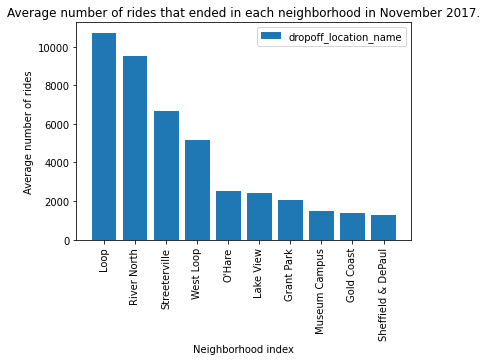

In [13]:
plt.bar(neighborhood_trips['dropoff_location_name'],neighborhood_trips['average_trips'])
plt.xticks(rotation=90)
plt.title('Average number of rides that ended in each neighborhood in November 2017.')
plt.ylabel('Average number of rides')
plt.xlabel('Neighborhood index')
plt.legend(['dropoff_location_name'])
plt.show;

In [14]:
# grouping together all the rows under 1200 average_trips as "Other":  
indices = neighborhood_trips[neighborhood_trips.average_trips < 1200].index
sum_av_of_trips = neighborhood_trips.loc[indices].average_trips.sum()
neighborhood_trips.drop(indices,axis=0,inplace=True)

temp_df = pd.DataFrame([['Other',sum_av_of_trips]],columns=neighborhood_trips.columns)
neighborhood_trips = pd.concat([neighborhood_trips,temp_df]).set_index('dropoff_location_name')
neighborhood_trips

,average_trips
dropoff_location_name,
Loop,10727.466667
River North,9523.666667
Streeterville,6664.666667
West Loop,5163.666667
O'Hare,2546.900000
Lake View,2420.966667
Grant Park,2068.533333
Museum Campus,1510.000000
Gold Coast,1364.233333


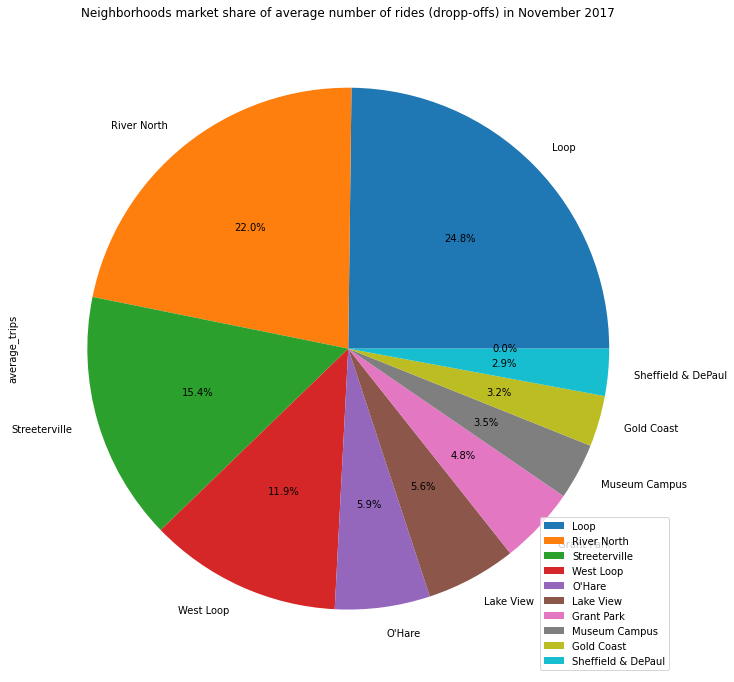

In [15]:
# pie plot of neighborhoods market share of average number of rides (drop-offs): 
neighborhood_trips.plot(kind='pie', y='average_trips', autopct='%1.1f%%', figsize=(15, 12))
plt.title('Neighborhoods market share of average number of rides (dropp-offs) in November 2017')
plt.legend(loc = 'lower right')
plt.show() 

**Conclusion**-Average number of rides that ended in each neighborhood in November 2017:

1) **Loop** neighborhood is the most popular neighborhood as the drop-off location. 

2) The 4 most dominent Neighborhoods as a drop-offs location are **Loop, River-north,Streererville, west loop** they count for almost 75% of all the drop offs in november 2017.  


In [16]:
company_trips.sort_values(by='trips_amount',ascending=False,inplace=True)

In [17]:
company_trips=company_trips[0:10]

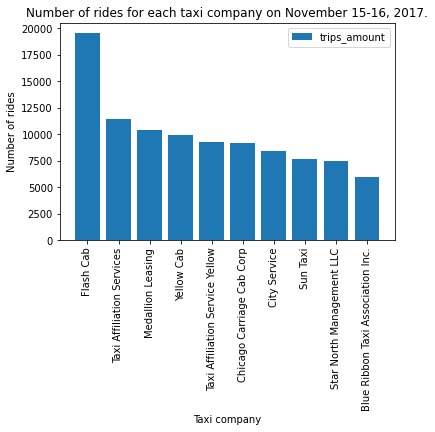

In [18]:
plt.bar(company_trips['company_name'],company_trips['trips_amount'])
plt.xticks(rotation=90)
plt.title('Number of rides for each taxi company on November 15-16, 2017.')
plt.ylabel('Number of rides')
plt.xlabel('Taxi company')
plt.legend(['trips_amount'])
plt.show;

In [19]:
# grouping together all the rows under 1200 average_trips as "Other":  
indices = company_trips[company_trips.trips_amount < 1200].index
sum_av_of_trips = company_trips.loc[indices].trips_amount.sum()
company_trips.drop(indices,axis=0,inplace=True)

temp_df = pd.DataFrame([['Other',sum_av_of_trips]],columns=company_trips.columns)
company_trips = pd.concat([company_trips,temp_df]).set_index('company_name')
company_trips 

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


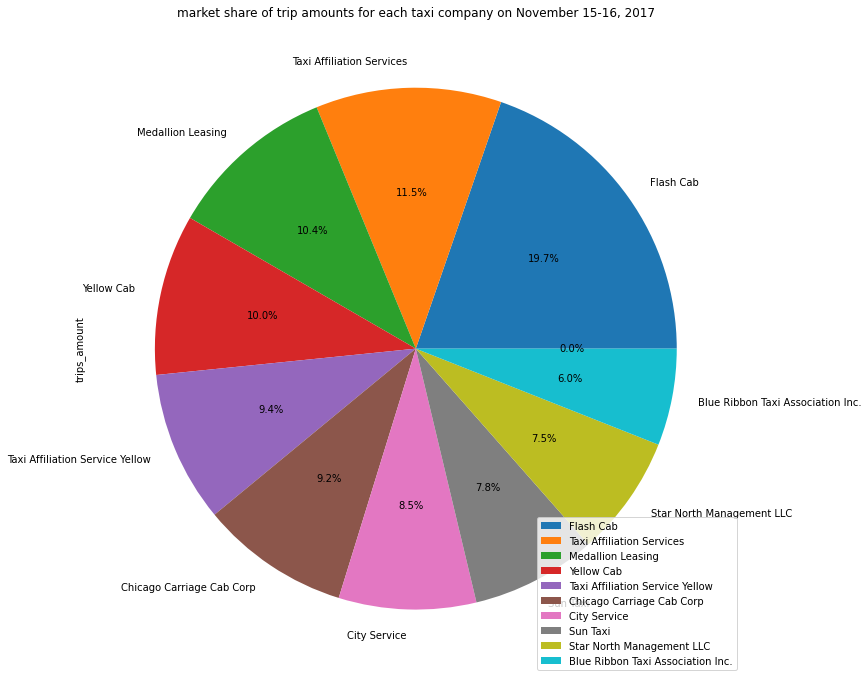

In [20]:
# pie plot of neighborhoods market share of average number of rides (drop-offs): 
company_trips.plot(kind='pie', y='trips_amount', autopct='%1.1f%%', figsize=(15, 12))
plt.title('market share of trip amounts for each taxi company on November 15-16, 2017')
plt.legend(loc = 'lower right')
plt.show() 

**Conclusion**-Number of rides for each taxi company on November 15-16, 2017:

1) **Flash cab**  is the most popular cab company. 

2) 4 cabs companies hold nearly half of the market trips in that period of time 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully! Visualizations look good

</div>

# Testing hypotheses

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The hypothesis testing is missing, could you take another look at the task?

</div>

In [22]:
results_last=pd.read_csv('/datasets/project_sql_result_07.csv')

In [26]:
results_last.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [32]:
not_rainy_duration=results_last[results_last['weather_conditions']=='Good']['duration_seconds']
not_rainy_duration=not_rainy_duration.tolist()

In [35]:
rainy_duration=rainy_duration.tolist()

**Test the hypothesis:** "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

**Null hypothesis**- The average duration of rides from the Loop to O'Hare International Airport is similar on rainy and not rainy saterdays"


In [38]:
alpha =0.05
results = st.ttest_ind(not_rainy_duration, rainy_duration, equal_var = False)
print('p-value:',results.pvalue)

p-value: 6.738994326108734e-12


In [39]:
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


**I rejectected the null hypothesis based on the alpha I defined, which means that we can accept the test hypothesis abovementioned**

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great, an appropriate test was used, and the conclusion is consistent with test results

</div>